In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy


In [2]:
df = pd.read_csv("bulk/stability_time_deseq2_limma_corrS_pca_distances.tsv",sep="\t",index_col=0)

df = pd.read_csv("bulk/stability_time_deseq2_pca_distances.tsv",sep="\t",index_col=0)

df = pd.read_csv("bulk/stability_time_deseq2_limma_corrT_pca_distances.tsv",sep="\t",index_col=0)


meta = pd.read_csv("bulk/stability_timepoints_meta.tsv",sep="\t",index_col=0)
expr = pd.read_csv("bulk/stability_timepoints.tsv",sep="\t",index_col=0)
vsd = pd.read_csv("bulk/stability_time_deseq2_vsd.tsv",sep="\t",index_col=0)

In [3]:
sample_markers_all = []
for i in set(meta['sample']):
    marker_df = pd.read_csv("stability_plots/"+str(i)+"_deseq2.tsv",sep="\t",index_col=0)
    marker_df_pos = marker_df.loc[marker_df['log2FoldChange']>0]
    marker_df_pos_sig = marker_df_pos.sort_values(by='padj')
    sample_markers = list(marker_df_pos_sig.head(n=10).index)
    sample_markers_all = sample_markers_all + sample_markers


In [4]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#set colors
colors = [
    'red',
    'green',
    'blue',
    'cyan',
    'magenta',
    'yellow',
    'black',
    'lightblue',
    'orange',
    'purple',
    'brown',
    'pink'
]

leaf_colors = {}
for sample,color in zip(list(set(meta['sample'])),colors):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    for ss in sample_samples:
        leaf_colors[ss] = color


In [5]:
distance_matrix = df

In [6]:
# Convert the square distance matrix to condensed form
def square_to_condensed(square_matrix):
    # Ensure the matrix is square
    assert square_matrix.shape[0] == square_matrix.shape[1], "Distance matrix must be square"
    # Use the upper triangle indices to extract the condensed form
    triu_indices = np.triu_indices(square_matrix.shape[0], k=1)
    condensed_matrix = square_matrix[triu_indices]
    return condensed_matrix

condensed_distance_matrix = square_to_condensed(distance_matrix.values)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')


In [7]:
leaf_colors = {'Stability_d21_sample_1': 'red',
                 'Stability_d49_sample_1': 'red',
                 'Stability_d35_sample_1': 'red',
                 'Stability_d42_sample_1': 'red',
                 'Stability_d10_sample_1': 'red',
                 'Stability_d28_sample_1': 'red',
                 'Stability_d21_sample_2': 'green',
                 'Stability_d49_sample_2': 'green',
                 'Stability_d35_sample_2': 'green',
                 'Stability_d42_sample_2': 'green',
                 'Stability_d10_sample_2': 'green',
                 'Stability_d28_sample_2': 'green',
                 'Stability_d21_sample_3': 'blue',
                 'Stability_d49_sample_3': 'blue',
                 'Stability_d35_sample_3': 'blue',
                 'Stability_d42_sample_3': 'blue',
                 'Stability_d10_sample_3': 'blue',
                 'Stability_d28_sample_3': 'blue',
                 'Stability_d21_sample_4': 'cyan',
                 'Stability_d49_sample_4': 'cyan',
                 'Stability_d35_sample_4': 'cyan',
                 'Stability_d42_sample_4': 'cyan',
                 'Stability_d10_sample_4': 'cyan',
                 'Stability_d28_sample_4': 'cyan',
                 'Stability_d21_sample_5': 'magenta',
                 'Stability_d49_sample_5': 'magenta',
                 'Stability_d35_sample_5': 'magenta',
                 'Stability_d42_sample_5': 'magenta',
                 'Stability_d10_sample_5': 'magenta',
                 'Stability_d28_sample_5': 'magenta',
                 'Stability_d21_sample_6': 'yellow',
                 'Stability_d49_sample_6': 'yellow',
                 'Stability_d35_sample_6': 'yellow',
                 'Stability_d42_sample_6': 'yellow',
                 'Stability_d10_sample_6': 'yellow',
                 'Stability_d28_sample_6': 'yellow',
                 'Stability_d21_sample_7': 'black',
                 'Stability_d49_sample_7': 'black',
                 'Stability_d35_sample_7': 'black',
                 'Stability_d42_sample_7': 'black',
                 'Stability_d10_sample_7': 'black',
                 'Stability_d28_sample_7': 'black',
                 'Stability_d21_sample_8': 'lightblue',
                 'Stability_d49_sample_8': 'lightblue',
                 'Stability_d35_sample_8': 'lightblue',
                 'Stability_d42_sample_8': 'lightblue',
                 'Stability_d10_sample_8': 'lightblue',
                 'Stability_d28_sample_8': 'lightblue',
                 'Stability_d21_sample_9': 'orange',
                 'Stability_d49_sample_9': 'orange',
                 'Stability_d35_sample_9': 'orange',
                 'Stability_d42_sample_9': 'orange',
                 'Stability_d10_sample_9': 'orange',
                 'Stability_d28_sample_9': 'orange',
                 'Stability_d21_sample_10': 'purple',
                 'Stability_d49_sample_10': 'purple',
                 'Stability_d35_sample_10': 'purple',
                 'Stability_d42_sample_10': 'purple',
                 'Stability_d10_sample_10': 'purple',
                 'Stability_d28_sample_10': 'purple',
                 'Stability_d21_sample_11': 'brown',
                 'Stability_d49_sample_11': 'brown',
                 'Stability_d35_sample_11': 'brown',
                 'Stability_d42_sample_11': 'brown',
                 'Stability_d10_sample_11': 'brown',
                 'Stability_d28_sample_11': 'brown',
                 'Stability_d21_sample_12': 'pink',
                 'Stability_d49_sample_12': 'pink',
                 'Stability_d35_sample_12': 'pink',
                 'Stability_d42_sample_12': 'pink',
                 'Stability_d10_sample_12': 'pink',
                 'Stability_d28_sample_12': 'pink'}

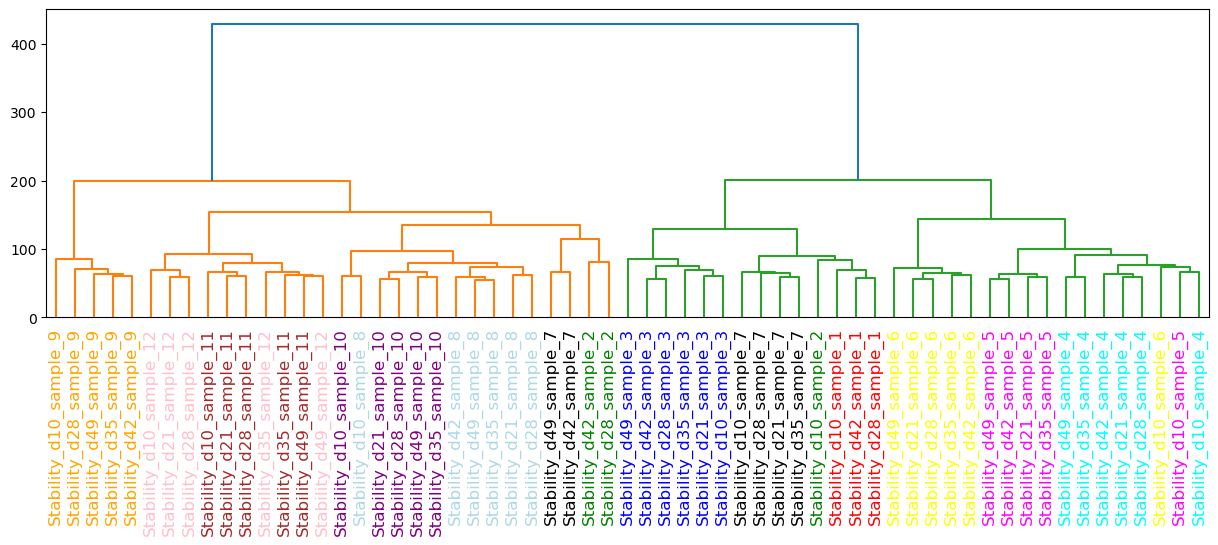

In [8]:
plt.figure(figsize=(15,4))
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=df.index,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

dendrogram_labels = []
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)
    dendrogram_labels.append(txt)

plt.savefig("stability_plots/dendrogram_colored_by_sample.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [9]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()


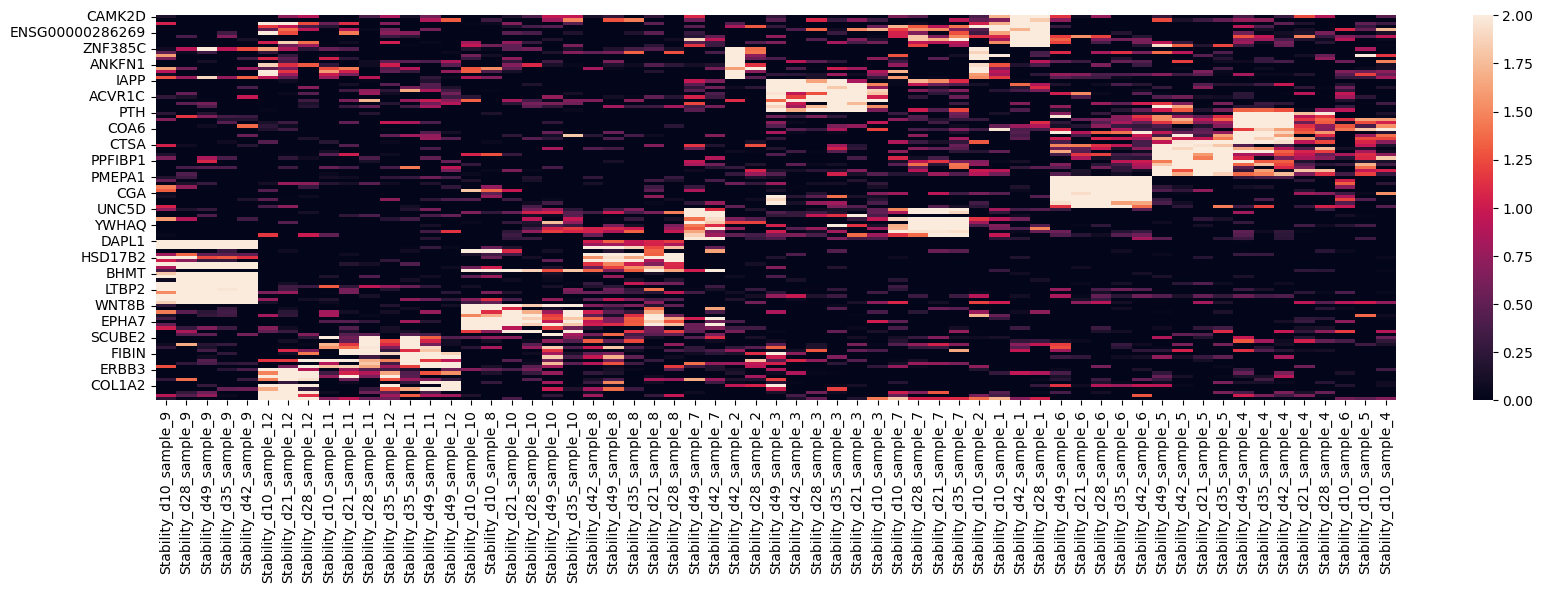

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/dendrogram_colored_by_sample_heatmap_markers.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [11]:
sorted_samples = list(meta.sort_values(by=['sample','t_int']).index)
sorted_samples = [x for x in sorted_samples if x in vsd.columns]

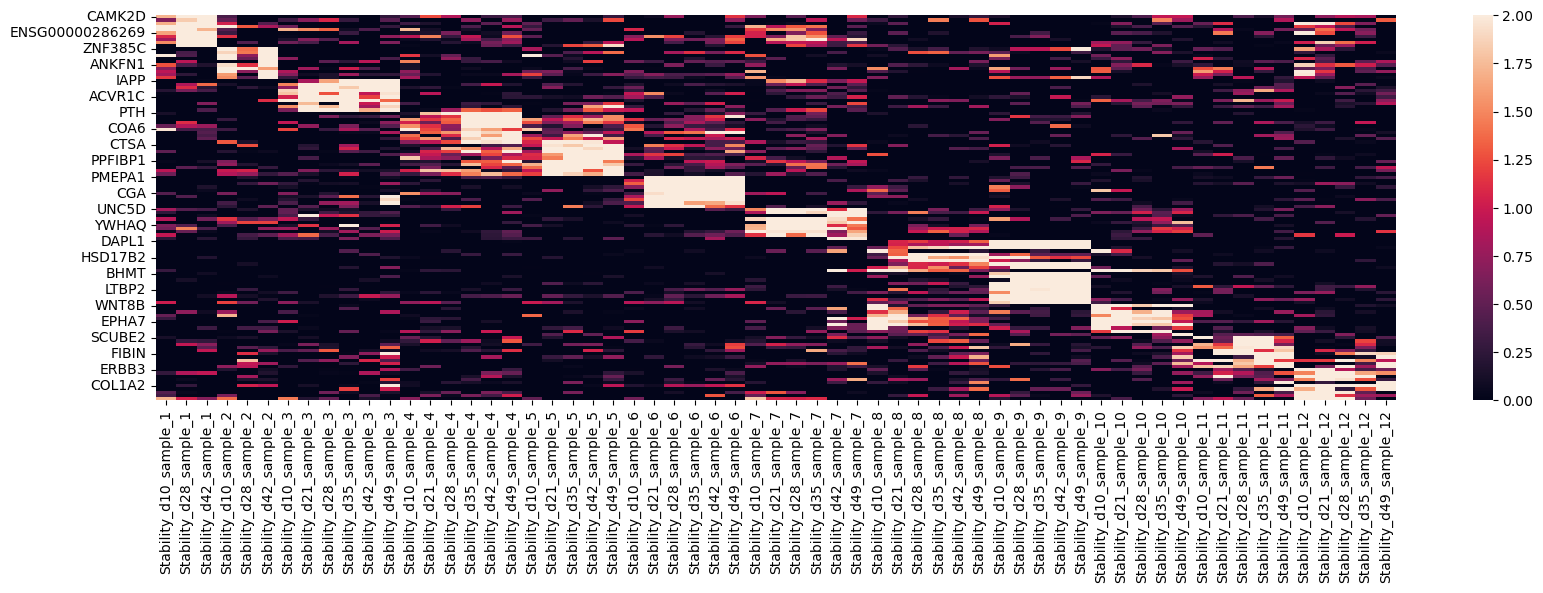

In [12]:
vsd_plot = vsd.loc[sample_markers_all,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [13]:
time_deseq2 = pd.read_csv("stability_plots/deseq2_time.tsv",sep="\t")
time_deseq2['signed_pval'] = np.sign(time_deseq2['log2FoldChange'])*-np.log10(time_deseq2['pvalue'])


In [14]:
early_genes = list(time_deseq2.sort_values(by='signed_pval').index[0:40])
late_genes = list(time_deseq2.sort_values(by='signed_pval',ascending=False).index[0:40])
time_genes = early_genes + late_genes


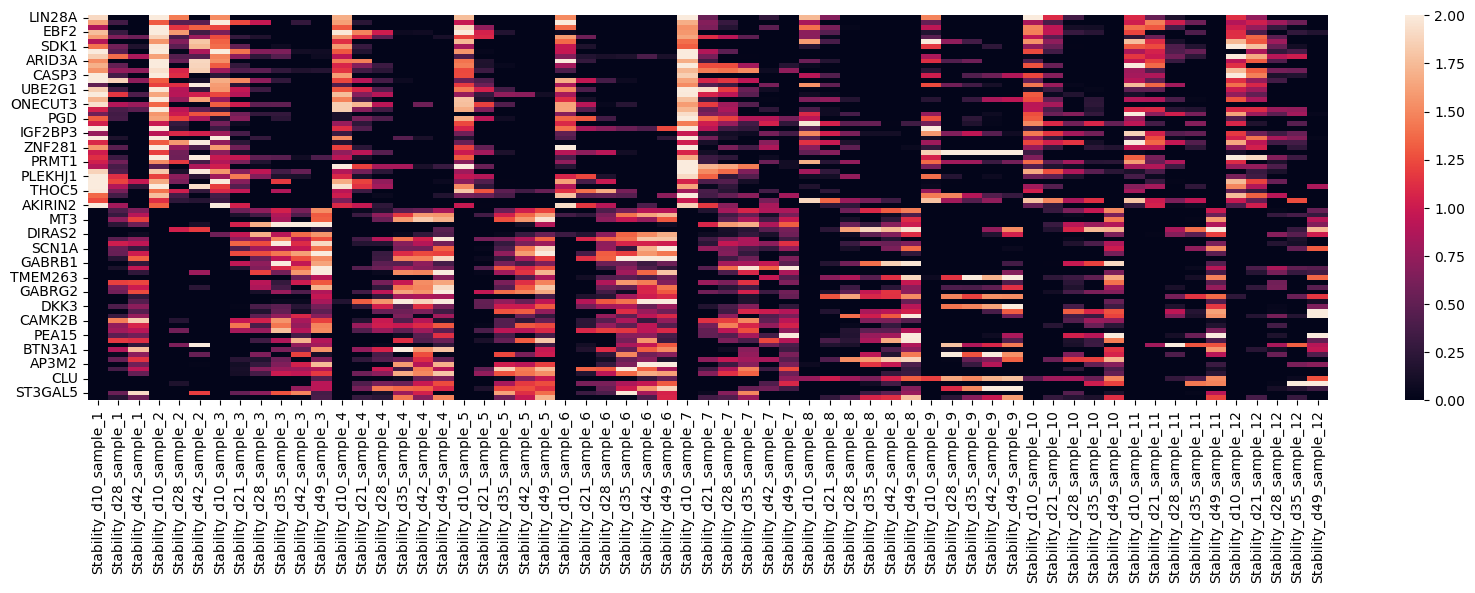

In [15]:
time_genes = [x for x in time_genes if x in vsd.index]
vsd_plot = vsd.loc[time_genes,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/sample_heatmap_markers_time_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [16]:
vsd_plot

,Stability_d10_sample_1,Stability_d28_sample_1,Stability_d42_sample_1,Stability_d10_sample_2,Stability_d28_sample_2,Stability_d42_sample_2,Stability_d10_sample_3,Stability_d21_sample_3,Stability_d28_sample_3,Stability_d35_sample_3,...,Stability_d10_sample_11,Stability_d21_sample_11,Stability_d28_sample_11,Stability_d35_sample_11,Stability_d49_sample_11,Stability_d10_sample_12,Stability_d21_sample_12,Stability_d28_sample_12,Stability_d35_sample_12,Stability_d49_sample_12
LIN28A,9.667330,5.359045,4.480533,10.041518,8.806027,5.705850,8.947130,5.440014,5.125312,4.628911,...,8.134492,7.077863,6.383817,4.628402,4.236806,8.199289,7.454463,5.833656,5.171818,4.507897
NR6A1,10.693415,8.532069,7.825800,10.165619,8.733409,8.736757,11.490791,10.050277,9.600198,7.666981,...,9.678309,10.442367,9.692891,8.896936,7.430049,9.449071,9.696612,9.289560,8.893638,6.398580
LIN28B,7.815852,6.523149,5.910482,9.257537,8.129942,8.324654,8.211141,6.669859,6.701224,6.260025,...,8.384334,8.284782,7.278335,6.777223,6.271924,7.993273,7.687054,7.184294,6.913920,6.015942
EBF2,8.432168,6.172521,4.822136,9.693852,8.161944,6.233913,6.663094,4.159520,3.926277,4.154735,...,7.593924,5.758223,5.478821,6.345892,4.947188,7.431088,6.324042,4.507432,6.112955,5.981564
ARID3B,8.288154,7.671149,7.612262,8.462678,7.512948,7.750467,8.064138,7.434287,7.364726,6.160900,...,7.406509,7.614917,6.794927,6.661138,6.044378,7.978429,8.129214,7.557968,6.902351,6.160741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLU,6.770207,7.181477,8.016112,6.607767,6.589497,7.356326,6.864818,6.871782,8.136797,8.283633,...,8.208689,8.442589,9.151000,9.304580,10.842748,7.955872,8.531505,8.638009,8.864363,10.508571
NFIB,5.054436,5.268887,4.869274,4.312873,6.269802,5.884907,5.527574,5.484121,5.125312,5.471676,...,4.865360,5.463639,5.796882,7.782605,7.840484,5.322960,4.948231,6.113174,8.533337,9.918447
MGLL,4.650820,4.885343,5.222487,4.312873,4.349866,4.686687,4.361611,5.077359,5.074641,4.939734,...,4.791278,4.637672,4.099365,4.480796,5.028695,4.742826,5.126759,5.427492,5.503007,5.601657
ST3GAL5,5.670167,6.678358,7.576394,5.892892,5.648258,7.109259,6.128842,6.669859,6.789078,7.162833,...,5.664152,6.104958,6.308292,6.345892,6.929142,6.156431,6.070996,6.144398,6.321160,6.277767


In [55]:
sc_markers_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_post.head()

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

sc_markers_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_pre_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_pre.head()

sc_meta_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_pre_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t",index_col=0)
sc_meta_pre.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_41__s1,iGlut_pre,hg38,1456,2184,2946,A1,A1,D5,1,1,...,0.0,0,0,50,0,0,10.189884,39.231434,13.276781,-0.856798
01_01_68__s1,iGlut_pre,hg38,1693,2776,3762,A1,A1,F8,1,1,...,0.0,0,0,50,0,0,25.132082,32.402280,14.830362,5.908925
01_01_76__s1,iGlut_pre,hg38,1454,2196,2981,A1,A1,G4,1,1,...,0.0,0,0,50,0,0,5.797632,52.208040,16.393394,-1.702099
01_01_83__s1,iGlut_pre,hg38,2391,4048,5592,A1,A1,G11,1,1,...,0.0,0,0,50,0,0,6.855360,43.492870,13.618956,-2.668232
01_01_92__s1,iGlut_pre,hg38,769,1076,1503,A1,A1,H8,1,1,...,0.0,0,0,50,0,0,25.081343,29.805347,14.698254,5.868345


In [56]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [58]:
meta_sorted = meta.sort_values(by=['sample','t_int'])
samples = list(set(meta_sorted['sample']))
samples = [str(x) for x in samples]

In [60]:
sc_markers_post = sc_markers_post.loc[sc_markers_post['logfoldchanges']>0].copy()
sc_markers_pre = sc_markers_pre.loc[sc_markers_pre['logfoldchanges']>0].copy()


In [61]:
sample_markers_all_sc = []
all_markers_plot_post = []
all_markers_plot_pre = []
for sample in samples:
    sample_ID = sample2ID[sample]
    if 'p1' in sample_ID:
        sample_clusters = list(sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)

        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:10])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]
            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_post = all_markers_plot_post + cluster_markers            
    if 'p3' in sample_ID:
        sample_clusters = list(sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)
        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_pre.loc[sc_markers_pre['cluster_old']==cluster].index[0:10])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]

            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_pre = all_markers_plot_pre + cluster_markers

In [62]:
sorted_samples = list(meta.sort_values(by=['sample','t_int']).index)
sorted_samples = [x for x in sorted_samples if x in vsd.columns]
sorted_samples_d28 = [x for x in sorted_samples if 'd28' in x]
sorted_samples_d10 = [x for x in sorted_samples if 'd10' in x]


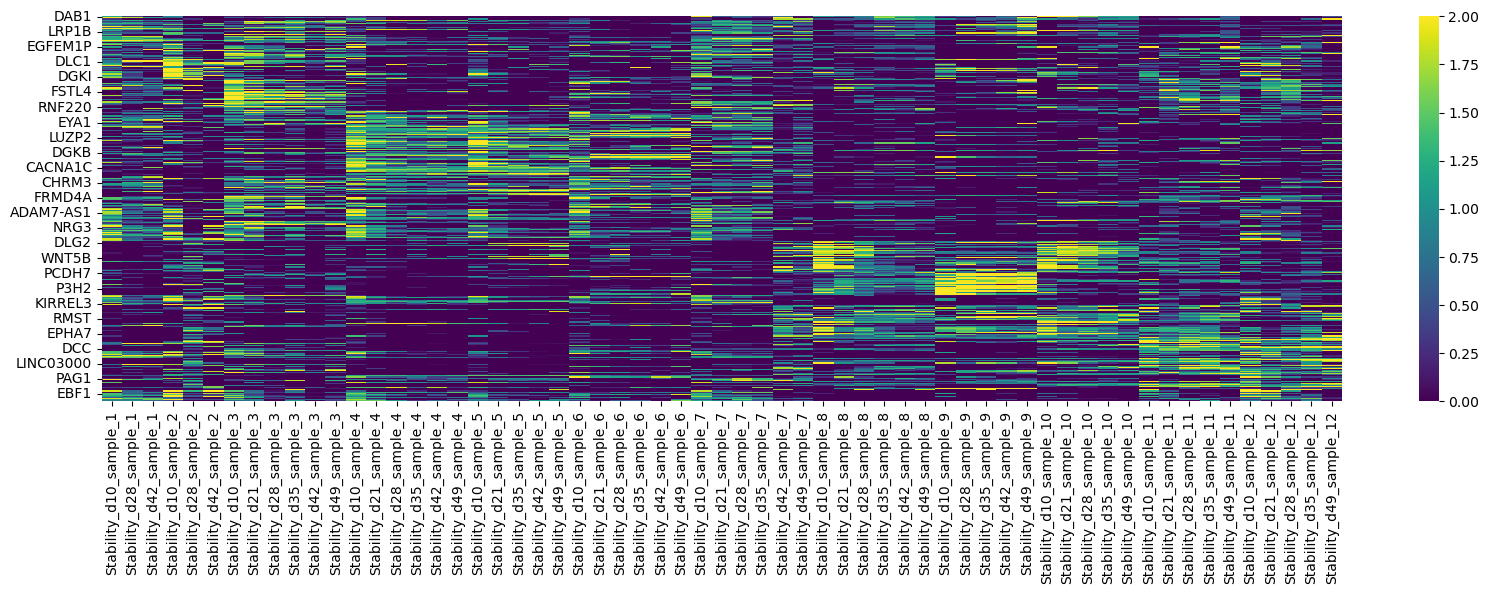

In [64]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='viridis')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



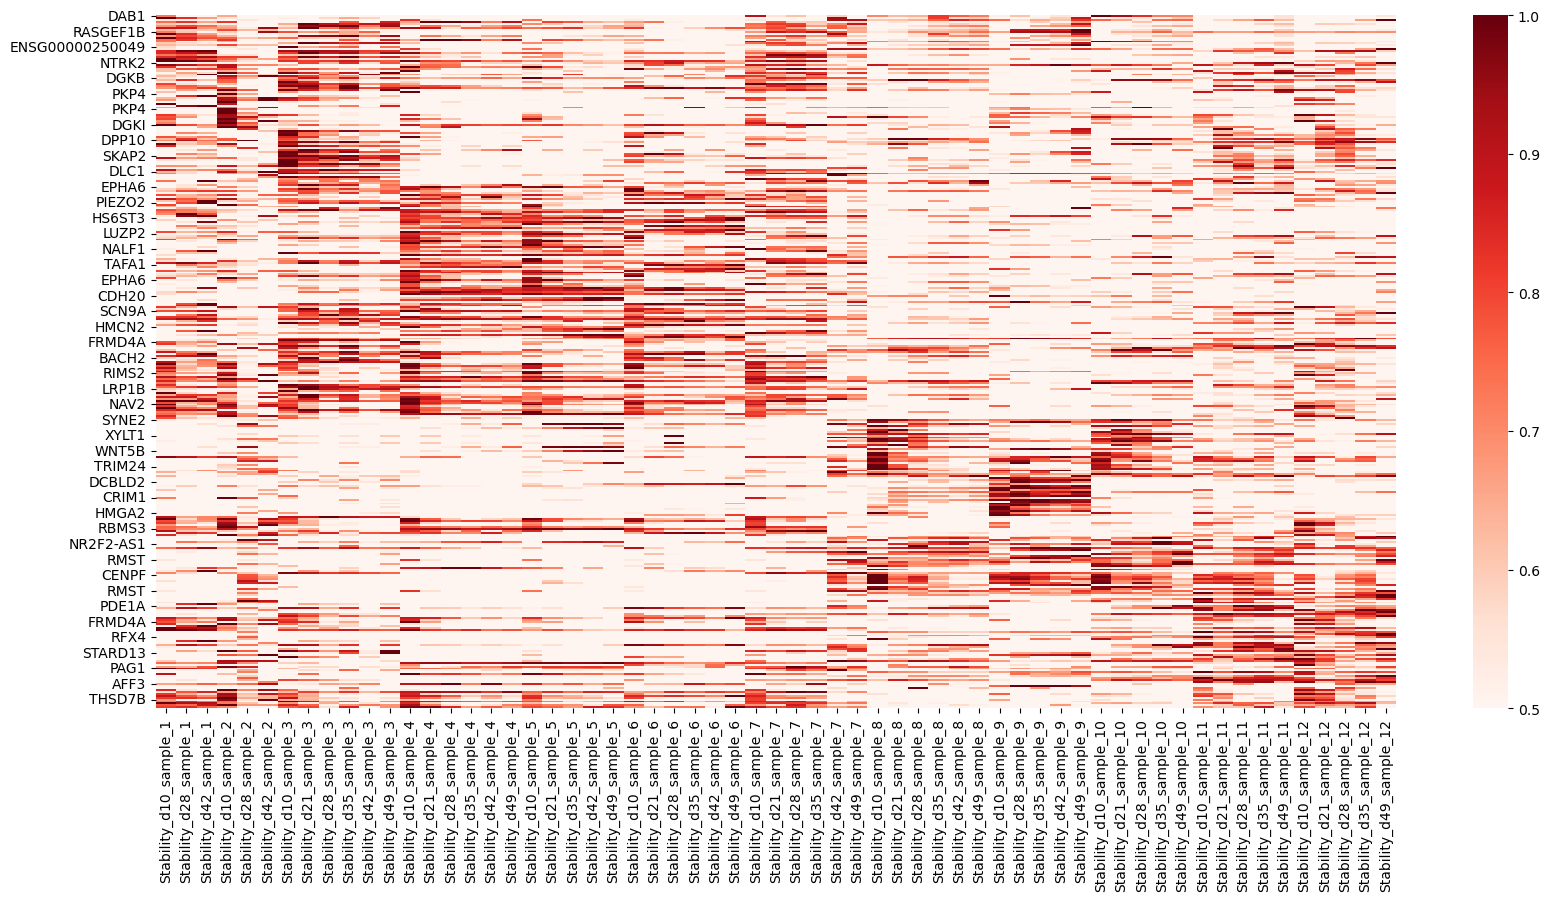

In [66]:
vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T

plt.figure(figsize=(20,9))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1,cmap='Reds')
#plt.savefig("stability_plots/"+genotype+"_heatmap_minmax_1_0.5.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

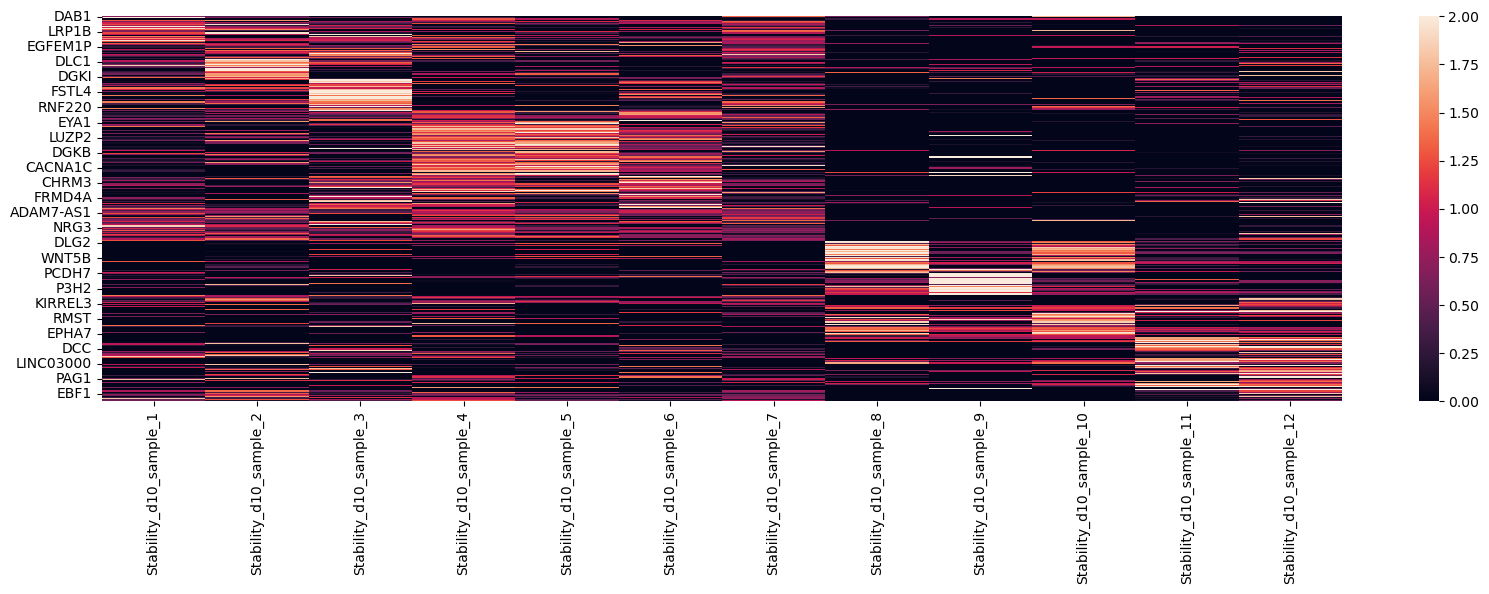

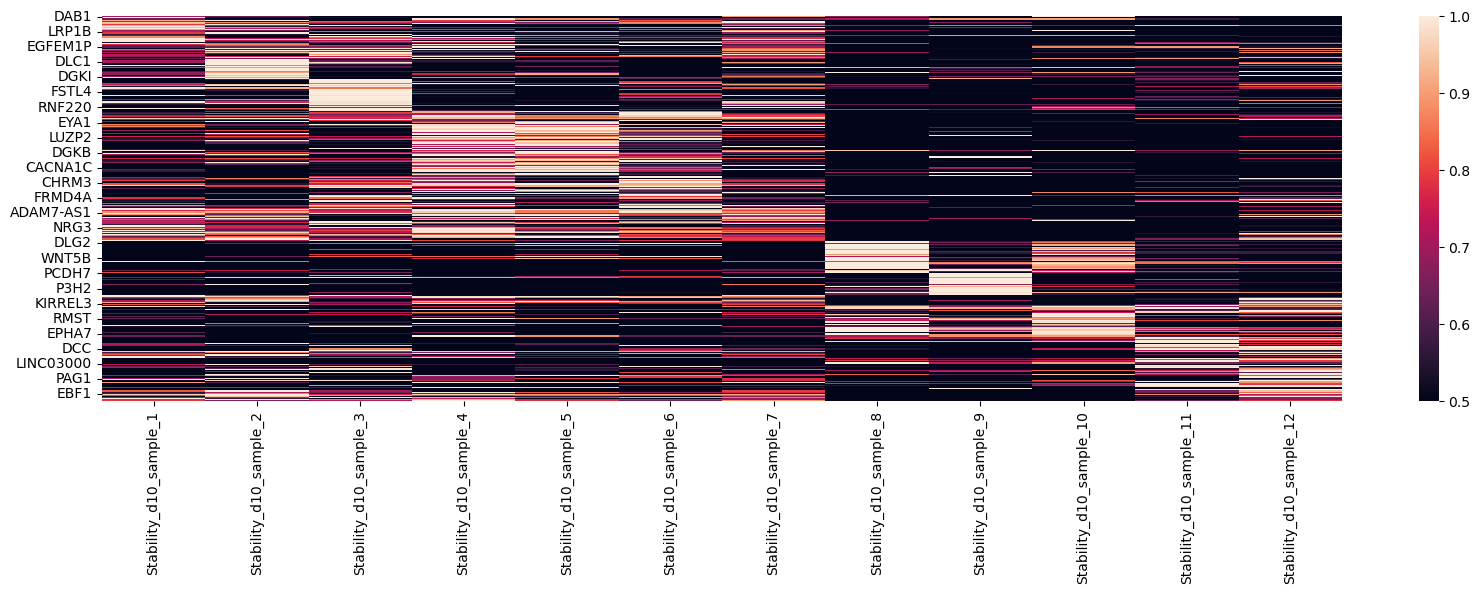

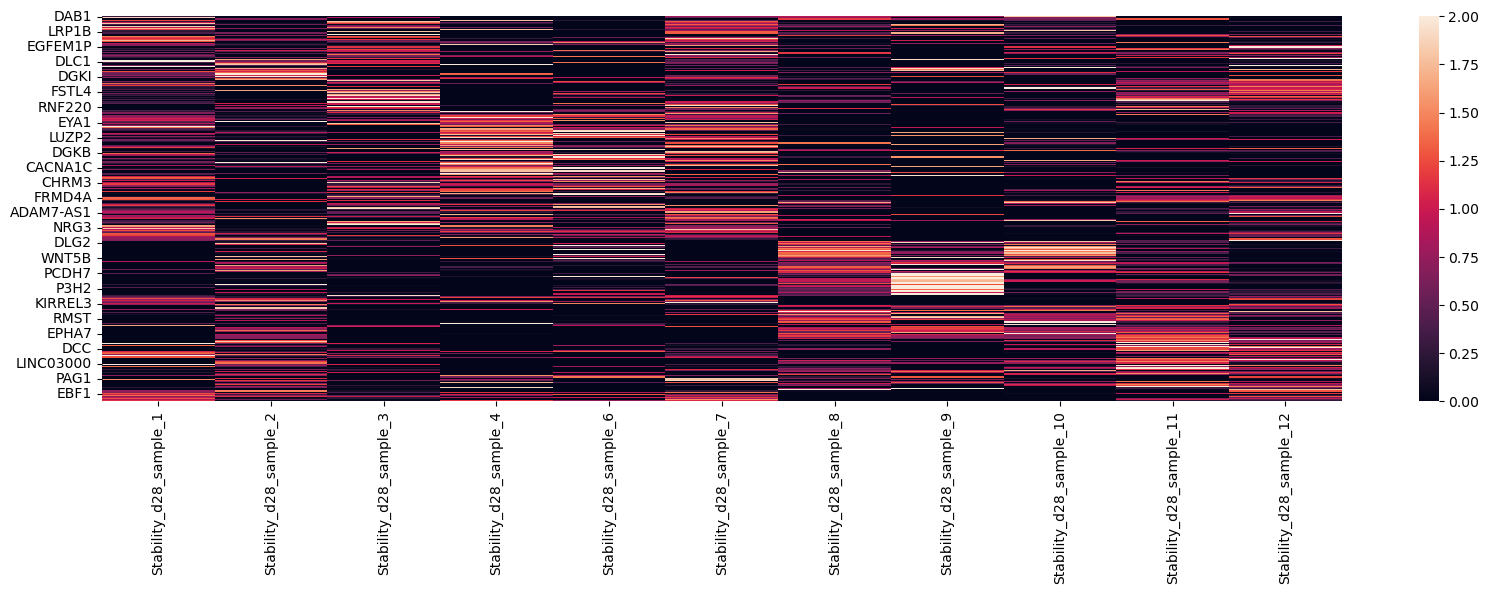

In [67]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_d10]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_d28]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



In [68]:
sample_markers_all_bulk = []
for i in set(meta['sample']):
    marker_df = pd.read_csv("stability_plots/"+str(i)+"_deseq2.tsv",sep="\t",index_col=0)
    marker_df_pos = marker_df.loc[marker_df['log2FoldChange']>0]
    marker_df_pos_sig = marker_df_pos.sort_values(by='padj')
    sample_markers = list(marker_df_pos_sig.head(n=100).index)
    sample_markers_all_bulk = sample_markers_all_bulk + sample_markers


In [69]:
sample_markers_all_bulk_sc = [x for x in sample_markers_all_bulk if x in sample_markers_all_sc]

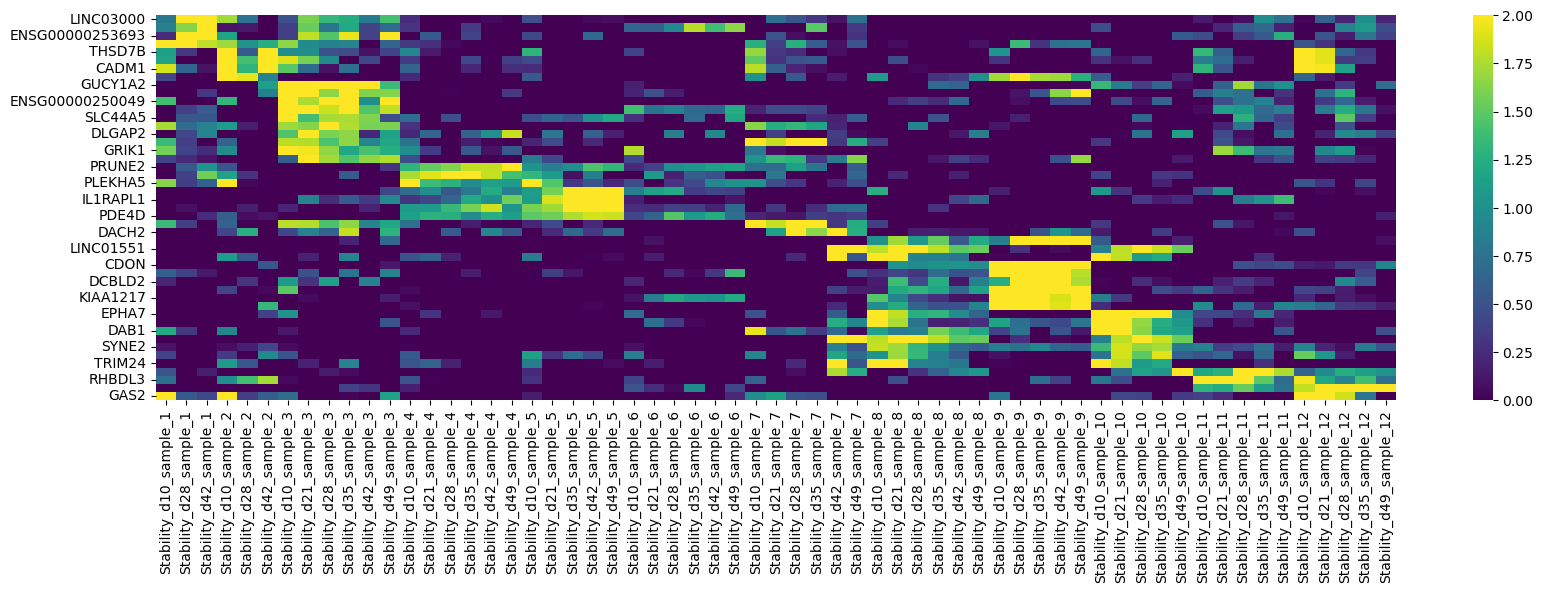

In [70]:
vsd_plot = vsd.loc[sample_markers_all_bulk_sc,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='viridis')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



In [20]:
# Sample data
data = np.random.rand(10, 4)  # 10 samples, 4 features

# Perform hierarchical clustering
linkage_matrix = sch.linkage(data, method='ward')


# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)

plt.show()


KeyError: 1

In [76]:
def leaf_label_func(id):
    return f'[{leaf_colors[id]}]{id}'


In [13]:
# Define a custom leaf label function
def leaf_label_func(id):
    leaf_colors = {'Stability_d21_sample_1': 'red',
                 'Stability_d49_sample_1': 'red',
                 'Stability_d35_sample_1': 'red',
                 'Stability_d42_sample_1': 'red',
                 'Stability_d10_sample_1': 'red',
                 'Stability_d28_sample_1': 'red',
                 'Stability_d21_sample_2': 'green',
                 'Stability_d49_sample_2': 'green',
                 'Stability_d35_sample_2': 'green',
                 'Stability_d42_sample_2': 'green',
                 'Stability_d10_sample_2': 'green',
                 'Stability_d28_sample_2': 'green',
                 'Stability_d21_sample_3': 'blue',
                 'Stability_d49_sample_3': 'blue',
                 'Stability_d35_sample_3': 'blue',
                 'Stability_d42_sample_3': 'blue',
                 'Stability_d10_sample_3': 'blue',
                 'Stability_d28_sample_3': 'blue',
                 'Stability_d21_sample_4': 'cyan',
                 'Stability_d49_sample_4': 'cyan',
                 'Stability_d35_sample_4': 'cyan',
                 'Stability_d42_sample_4': 'cyan',
                 'Stability_d10_sample_4': 'cyan',
                 'Stability_d28_sample_4': 'cyan',
                 'Stability_d21_sample_5': 'magenta',
                 'Stability_d49_sample_5': 'magenta',
                 'Stability_d35_sample_5': 'magenta',
                 'Stability_d42_sample_5': 'magenta',
                 'Stability_d10_sample_5': 'magenta',
                 'Stability_d28_sample_5': 'magenta',
                 'Stability_d21_sample_6': 'yellow',
                 'Stability_d49_sample_6': 'yellow',
                 'Stability_d35_sample_6': 'yellow',
                 'Stability_d42_sample_6': 'yellow',
                 'Stability_d10_sample_6': 'yellow',
                 'Stability_d28_sample_6': 'yellow',
                 'Stability_d21_sample_7': 'black',
                 'Stability_d49_sample_7': 'black',
                 'Stability_d35_sample_7': 'black',
                 'Stability_d42_sample_7': 'black',
                 'Stability_d10_sample_7': 'black',
                 'Stability_d28_sample_7': 'black',
                 'Stability_d21_sample_8': 'white',
                 'Stability_d49_sample_8': 'white',
                 'Stability_d35_sample_8': 'white',
                 'Stability_d42_sample_8': 'white',
                 'Stability_d10_sample_8': 'white',
                 'Stability_d28_sample_8': 'white',
                 'Stability_d21_sample_9': 'orange',
                 'Stability_d49_sample_9': 'orange',
                 'Stability_d35_sample_9': 'orange',
                 'Stability_d42_sample_9': 'orange',
                 'Stability_d10_sample_9': 'orange',
                 'Stability_d28_sample_9': 'orange',
                 'Stability_d21_sample_10': 'purple',
                 'Stability_d49_sample_10': 'purple',
                 'Stability_d35_sample_10': 'purple',
                 'Stability_d42_sample_10': 'purple',
                 'Stability_d10_sample_10': 'purple',
                 'Stability_d28_sample_10': 'purple',
                 'Stability_d21_sample_11': 'brown',
                 'Stability_d49_sample_11': 'brown',
                 'Stability_d35_sample_11': 'brown',
                 'Stability_d42_sample_11': 'brown',
                 'Stability_d10_sample_11': 'brown',
                 'Stability_d28_sample_11': 'brown',
                 'Stability_d21_sample_12': 'pink',
                 'Stability_d49_sample_12': 'pink',
                 'Stability_d35_sample_12': 'pink',
                 'Stability_d42_sample_12': 'pink',
                 'Stability_d10_sample_12': 'pink',
                 'Stability_d28_sample_12': 'pink'}


    return f'[{leaf_colors[id]}]{id}'


# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    leaf_label_func=leaf_label_func,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)


dendrogram_labels = df.index[dendrogram['leaves']]



KeyError: 47

In [86]:
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    df,
    labels=df.index,
)



ValueError: Dimensions of Z and labels must be consistent.

In [57]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)

<Axes: >

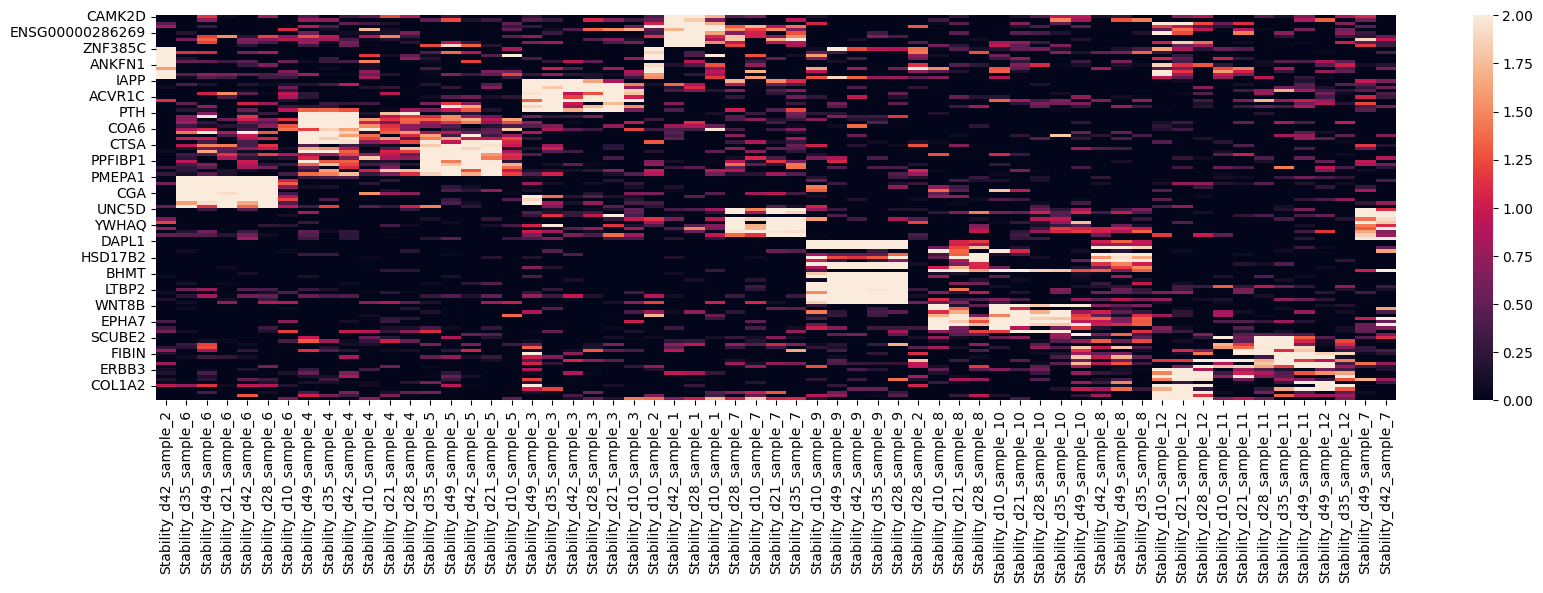

In [88]:
# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix, method='complete')


/tmp/ipykernel_23962/3190910593.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='complete')


,Stability_d21_sample_4,Stability_d21_sample_5,Stability_d21_sample_10,Stability_d21_sample_7,Stability_d21_sample_6,Stability_d21_sample_12,Stability_d21_sample_3,Stability_d21_sample_11,Stability_d21_sample_8,Stability_d49_sample_4,...,Stability_d28_sample_9,Stability_d28_sample_10,Stability_d28_sample_11,Stability_d28_sample_1,Stability_d28_sample_2,Stability_d28_sample_3,Stability_d28_sample_12,Stability_d28_sample_8,Stability_d28_sample_7,Stability_d28_sample_6
Stability_d21_sample_4,0.000000,67.782094,115.101891,82.523176,80.502424,103.971158,82.522993,112.171177,123.012091,72.505498,...,146.309302,110.865376,116.654967,77.412260,107.327794,84.765478,103.708090,112.615685,80.412650,80.515964
Stability_d21_sample_5,67.782094,0.000000,113.158812,85.359722,84.064952,104.280456,87.863328,109.050005,119.591049,73.730530,...,140.666440,109.917487,113.817769,87.318636,99.138383,89.006898,103.894902,112.329630,86.002927,87.810426
Stability_d21_sample_10,115.101891,113.158812,0.000000,110.364017,117.169863,83.047050,111.667214,74.853558,60.713964,120.229177,...,100.400945,56.782005,75.250551,110.849985,86.399418,106.207441,83.058510,64.761733,113.141966,120.949712
Stability_d21_sample_7,82.523176,85.359722,110.364017,0.000000,98.640491,103.280597,79.534203,109.246944,119.852087,91.271725,...,146.542073,103.525426,112.287712,69.080198,103.497069,77.287892,101.695766,110.826150,61.539714,102.271311
Stability_d21_sample_6,80.502424,84.064952,117.169863,98.640491,0.000000,102.323896,88.375818,110.292680,119.645411,89.073734,...,139.957723,114.232107,113.009625,93.651415,110.408458,91.303309,99.321278,116.784170,100.772621,56.767881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stability_d28_sample_3,84.765478,89.006898,106.207441,77.287892,91.303309,88.562861,62.843063,95.791416,114.034644,91.241696,...,141.241480,104.718965,104.101528,74.185320,107.093324,0.000000,91.311161,108.707402,86.036784,97.687929
Stability_d28_sample_12,103.708090,103.894902,83.058510,101.695766,99.321278,59.311254,94.972293,67.586451,86.858233,110.014706,...,113.536570,85.124346,70.526872,101.469965,91.854303,91.311161,0.000000,90.362024,110.337752,108.865110
Stability_d28_sample_8,112.615685,112.329630,64.761733,110.826150,116.784170,84.343329,106.810143,77.590665,62.285232,122.670429,...,102.161014,70.336857,84.346019,113.025662,92.972649,108.707402,90.362024,0.000000,113.860567,121.664447
Stability_d28_sample_7,80.412650,86.002927,113.141966,61.539714,100.772621,105.350942,79.716192,111.257868,122.801125,90.560333,...,153.129456,112.679775,121.935942,73.322110,106.582014,86.036784,110.337752,113.860567,0.000000,102.136898


/tmp/ipykernel_23962/3114295786.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='complete')


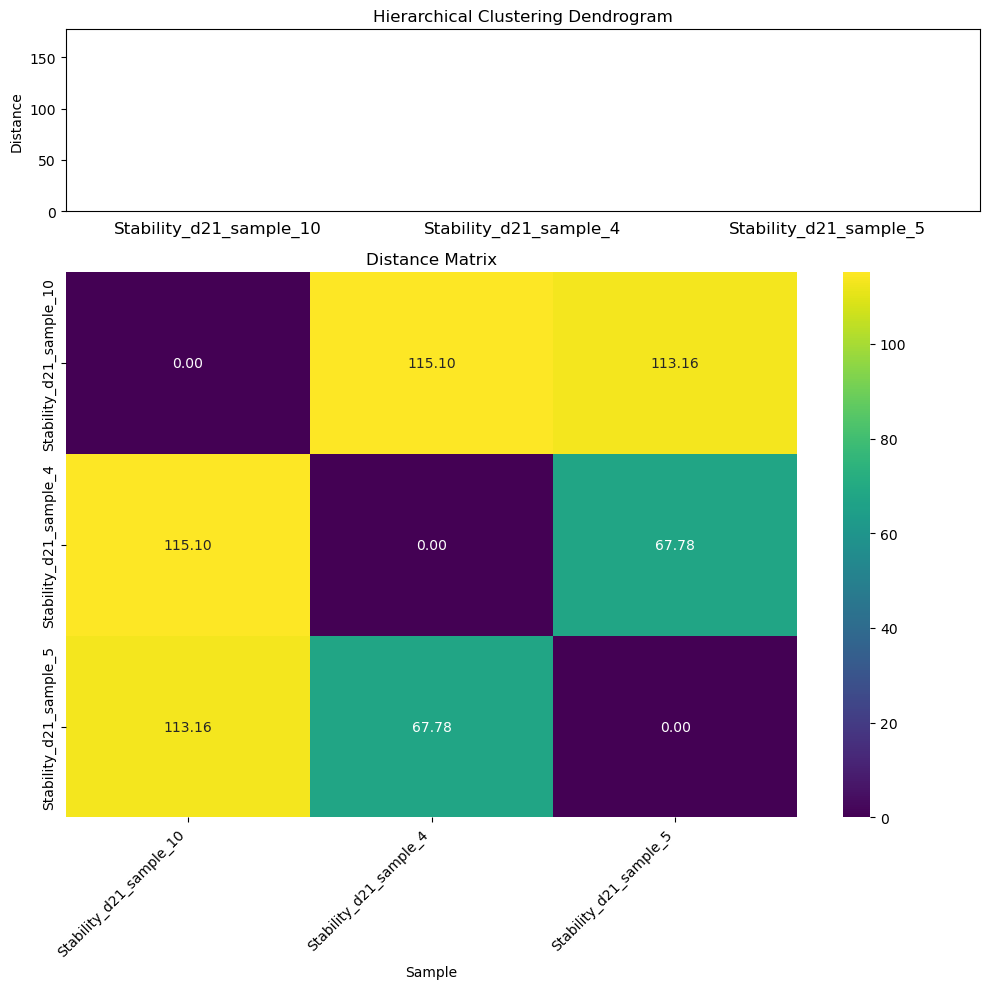

In [30]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Distance matrix as a numpy array
distance_matrix = np.array([
    [0.000000, 67.782094, 115.101891],
    [67.782094, 0.000000, 113.158812],
    [115.101891, 113.158812, 0.000000]
])

# Sample labels
labels = ["Stability_d21_sample_4", "Stability_d21_sample_5", "Stability_d21_sample_10"]

# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix, method='complete')

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 3]}, sharex=True)

# Plot the dendrogram on the first subplot
dendrogram = sch.dendrogram(linked, labels=labels, ax=ax1)
ax1.set_title('Hierarchical Clustering Dendrogram')
ax1.set_ylabel('Distance')

# Reorder the distance matrix according to the dendrogram leaves
dendro_order = dendrogram['leaves']
ordered_distance_matrix = distance_matrix[dendro_order, :][:, dendro_order]
ordered_labels = [labels[i] for i in dendro_order]

# Plot the distance matrix as a heatmap on the second subplot
sns.heatmap(ordered_distance_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=ordered_labels, yticklabels=ordered_labels, ax=ax2)
ax2.set_title('Distance Matrix')
ax2.set_xlabel('Sample')

# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_23962/297810392.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(df, 'single')


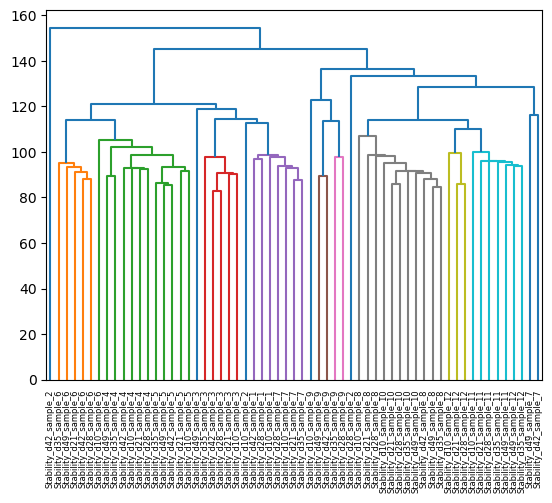

In [16]:
Z = hierarchy.linkage(df, 'single')

plt.figure()
dn = hierarchy.dendrogram(Z,labels=df.index)

In [3]:
df

,Stability_d21_sample_4,Stability_d21_sample_5,Stability_d21_sample_10,Stability_d21_sample_7,Stability_d21_sample_6,Stability_d21_sample_12,Stability_d21_sample_3,Stability_d21_sample_11,Stability_d21_sample_8,Stability_d49_sample_4,...,Stability_d28_sample_9,Stability_d28_sample_10,Stability_d28_sample_11,Stability_d28_sample_1,Stability_d28_sample_2,Stability_d28_sample_3,Stability_d28_sample_12,Stability_d28_sample_8,Stability_d28_sample_7,Stability_d28_sample_6
Stability_d21_sample_4,0.000000,67.782094,115.101891,82.523176,80.502424,103.971158,82.522993,112.171177,123.012091,72.505498,...,146.309302,110.865376,116.654967,77.412260,107.327794,84.765478,103.708090,112.615685,80.412650,80.515964
Stability_d21_sample_5,67.782094,0.000000,113.158812,85.359722,84.064952,104.280456,87.863328,109.050005,119.591049,73.730530,...,140.666440,109.917487,113.817769,87.318636,99.138383,89.006898,103.894902,112.329630,86.002927,87.810426
Stability_d21_sample_10,115.101891,113.158812,0.000000,110.364017,117.169863,83.047050,111.667214,74.853558,60.713964,120.229177,...,100.400945,56.782005,75.250551,110.849985,86.399418,106.207441,83.058510,64.761733,113.141966,120.949712
Stability_d21_sample_7,82.523176,85.359722,110.364017,0.000000,98.640491,103.280597,79.534203,109.246944,119.852087,91.271725,...,146.542073,103.525426,112.287712,69.080198,103.497069,77.287892,101.695766,110.826150,61.539714,102.271311
Stability_d21_sample_6,80.502424,84.064952,117.169863,98.640491,0.000000,102.323896,88.375818,110.292680,119.645411,89.073734,...,139.957723,114.232107,113.009625,93.651415,110.408458,91.303309,99.321278,116.784170,100.772621,56.767881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stability_d28_sample_3,84.765478,89.006898,106.207441,77.287892,91.303309,88.562861,62.843063,95.791416,114.034644,91.241696,...,141.241480,104.718965,104.101528,74.185320,107.093324,0.000000,91.311161,108.707402,86.036784,97.687929
Stability_d28_sample_12,103.708090,103.894902,83.058510,101.695766,99.321278,59.311254,94.972293,67.586451,86.858233,110.014706,...,113.536570,85.124346,70.526872,101.469965,91.854303,91.311161,0.000000,90.362024,110.337752,108.865110
Stability_d28_sample_8,112.615685,112.329630,64.761733,110.826150,116.784170,84.343329,106.810143,77.590665,62.285232,122.670429,...,102.161014,70.336857,84.346019,113.025662,92.972649,108.707402,90.362024,0.000000,113.860567,121.664447
Stability_d28_sample_7,80.412650,86.002927,113.141966,61.539714,100.772621,105.350942,79.716192,111.257868,122.801125,90.560333,...,153.129456,112.679775,121.935942,73.322110,106.582014,86.036784,110.337752,113.860567,0.000000,102.136898
